In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import os

In [3]:
# Connect to SQLite database
conn = sqlite3.connect(r'C:\Users\krish\Desktop\CSUN KRISH MS BANA\CSUN BANA SEM 4\1. BANA 698 GRADUATE PROJECT\culminating-project-group-2\Database\team2_DB.db')

# List all tables in the database
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, conn)
print("Tables in the database:")
print(tables)


Tables in the database:
                         name
0             sqlite_sequence
1                  Year_Table
2                Country_Year
3          Country_Indicators
4         Economic_Indicators
5    Environmental_Indicators
6  Public_Debt_Indicators_Agg
7           Social_Indicators
8      Statistical_Indicators
9                     Country


In [5]:
# Load data from 'Economic_Indicators' table
df_economic = pd.read_sql_query("SELECT * FROM Environmental_Indicators;", conn)

# Display first few rows
df_economic.head()


,Country Name,Country Code,Time,Time Code,Carbon dioxide (CO2) emissions (total) excluding LULUCF (% change from 1990) [EN.GHG.CO2.ZG.AR5],Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e) [EN.GHG.CO2.MT.CE.AR5],Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita) [EN.GHG.CO2.PC.CE.AR5],Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS],"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]","Access to electricity, urban (% of urban population) [EG.ELC.ACCS.UR.ZS]",Forest area (sq. km) [AG.LND.FRST.K2]
0,Afghanistan,AFG,2021.0,YR2021,171.3982616,7.9308,0.198267958,20,97.1,99.5,12084.4
1,Afghanistan,AFG,2022.0,YR2022,182.6603244,8.2599,0.20355189,20,81.7,95.9,12084.4
2,Afghanistan,AFG,2023.0,YR2023,197.970707,8.7073,0.210043425,..,..,..,..
3,Albania,ALB,2021.0,YR2021,-24.16403311,5.0393,1.792282583,41.9,100,100,7889
4,Albania,ALB,2022.0,YR2022,-30.63957863,4.609,1.659293031,..,100,100,7889


In [6]:
# SQL Query to find common countries across all tables
query = """
SELECT DISTINCT Country_Name FROM Country
INTERSECT
SELECT DISTINCT "Country Name" FROM Country_Indicators
INTERSECT
SELECT DISTINCT "Country Name" FROM Economic_Indicators
INTERSECT
SELECT DISTINCT "Country Name" FROM Environmental_Indicators
INTERSECT
SELECT DISTINCT "Country Name" FROM Public_Debt_Indicators_Agg
INTERSECT
SELECT DISTINCT "Country Name" FROM Social_Indicators
INTERSECT
SELECT DISTINCT Country_Name FROM Statistical_Indicators;
"""

# Execute and load into DataFrame
common_countries = pd.read_sql_query(query, conn)

# Display the result
print("Common Countries Across All Tables:")
print(common_countries)

Common Countries Across All Tables:
       Country_Name
0           Albania
1         Argentina
2           Armenia
3         Australia
4           Austria
..              ...
101         Turkiye
102          Uganda
103  United Kingdom
104   United States
105         Uruguay

[106 rows x 1 columns]


In [ ]:


# Define the file path
file_path = r'C:\Users\krish\Desktop\CSUN KRISH MS BANA\CSUN BANA SEM 4\1. BANA 698 GRADUATE PROJECT\culminating-project-group-2\Database\DataSources\World Development Indicators (WDI)\Envirnmental_Indicators.csv'

# Load CSV into DataFrame
df_env = pd.read_csv(file_path)

# Display first few rows
print("First 5 Rows:")
print(df_env.head())

# Display DataFrame info
print("\nDataFrame Info:")
df_env.info()


First 5 Rows:
  Country Name Country Code    Time Time Code  \
0  Afghanistan          AFG  2021.0    YR2021   
1  Afghanistan          AFG  2022.0    YR2022   
2  Afghanistan          AFG  2023.0    YR2023   
3      Albania          ALB  2021.0    YR2021   
4      Albania          ALB  2022.0    YR2022   

  Carbon dioxide (CO2) emissions (total) excluding LULUCF (% change from 1990) [EN.GHG.CO2.ZG.AR5]  \
0                                        171.3982616                                                 
1                                        182.6603244                                                 
2                                         197.970707                                                 
3                                       -24.16403311                                                 
4                                       -30.63957863                                                 

  Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e) [EN.GHG.CO

In [ ]:

# Load the CSV file
df = pd.read_csv(file_path)

# Define the list of countries to include
countries_to_include = [
    'Albania', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Bangladesh', 'Barbados', 'Belgium',
    'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Cambodia',
    'Canada', 'Chile', 'China', 'Colombia', 'Congo, Dem. Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
    'Cyprus', 'Czechia', 'Denmark', 'Dominican Republic', 'El Salvador', 'Estonia', 'Fiji', 'Finland',
    'France', 'Georgia', 'Germany', 'Greece', 'Guatemala', 'Honduras', 'Hungary', 'Iceland', 'Indonesia',
    'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kenya', 'Korea, Rep.', 'Kosovo', 'Kyrgyz Republic',
    'Latvia', 'Lebanon', 'Lesotho', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia',
    'Maldives', 'Malta', 'Mauritius', 'Mexico', 'Moldova', 'Mongolia', 'Morocco', 'Nepal', 'Netherlands',
    'New Zealand', 'Nicaragua', 'Nigeria', 'North Macedonia', 'Norway', 'Pakistan', 'Papua New Guinea',
    'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russian Federation', 'Rwanda',
    'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Slovak Republic', 'Slovenia', 'Solomon Islands',
    'South Africa', 'Spain', 'Sri Lanka', 'St. Lucia', 'Suriname', 'Sweden', 'Switzerland', 'Tajikistan',
    'Tanzania', 'Thailand', 'Timor-Leste', 'Togo', 'Tonga', 'Turkiye', 'Uganda', 'United Kingdom',
    'United States', 'Uruguay'
]

# Filter the dataframe to include only the specified countries
filtered_df = df[df['Country Name'].isin(countries_to_include)]

# Remove columns with more than 60% missing values
threshold = 0.6  # 60%
cleaned_df = filtered_df.loc[:, filtered_df.isnull().mean() < threshold]

# Display the shape of the cleaned dataframe and a preview
print(f"Cleaned Data Shape: {cleaned_df.shape}")
print(cleaned_df.head())

# Save the cleaned data
output_path = r'C:\Users\krish\Desktop\Cleaned_Envirnmental_Indicators.csv'
cleaned_df.to_csv(output_path, index=False)
print(f"Cleaned data saved successfully at: {output_path}")


Cleaned Data Shape: (318, 11)
   Country Name Country Code    Time Time Code  \
3       Albania          ALB  2021.0    YR2021   
4       Albania          ALB  2022.0    YR2022   
5       Albania          ALB  2023.0    YR2023   
21    Argentina          ARG  2021.0    YR2021   
22    Argentina          ARG  2022.0    YR2022   

   Carbon dioxide (CO2) emissions (total) excluding LULUCF (% change from 1990) [EN.GHG.CO2.ZG.AR5]  \
3                                        -24.16403311                                                 
4                                        -30.63957863                                                 
5                                        -30.89841986                                                 
21                                        90.30498784                                                 
22                                        93.11930818                                                 

   Carbon dioxide (CO2) emissions (total) excludin

C:\Users\krish\AppData\Local\Temp\ipykernel_31008\4179527212.py:16: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\krish\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


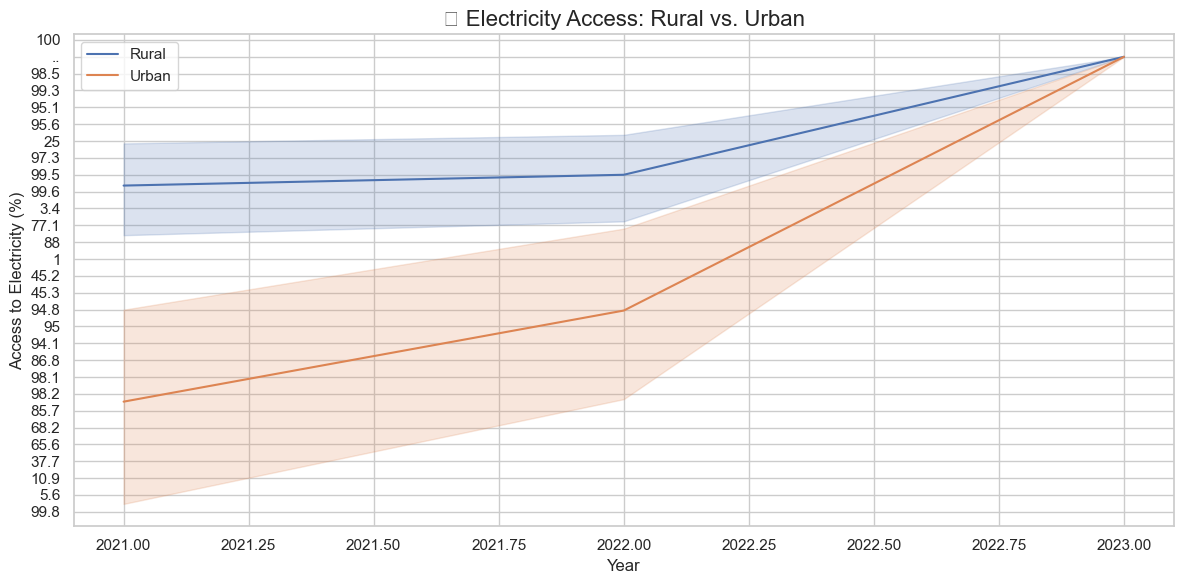

In [15]:
# Electricity Access: Rural vs. Urban
plt.figure(figsize=(12, 6))
sns.lineplot(data=cleaned_df, 
             x='Time', 
             y='Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]', 
             label='Rural')
sns.lineplot(data=cleaned_df, 
             x='Time', 
             y='Access to electricity, urban (% of urban population) [EG.ELC.ACCS.UR.ZS]', 
             label='Urban')

plt.title('Electricity Access: Rural vs. Urban', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Access to Electricity (%)')
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\krish\AppData\Local\Temp\ipykernel_31008\486541393.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_co2,
C:\Users\krish\AppData\Local\Temp\ipykernel_31008\486541393.py:16: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\krish\AppData\Local\Temp\ipykernel_31008\486541393.py:16: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\krish\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\krish\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, *

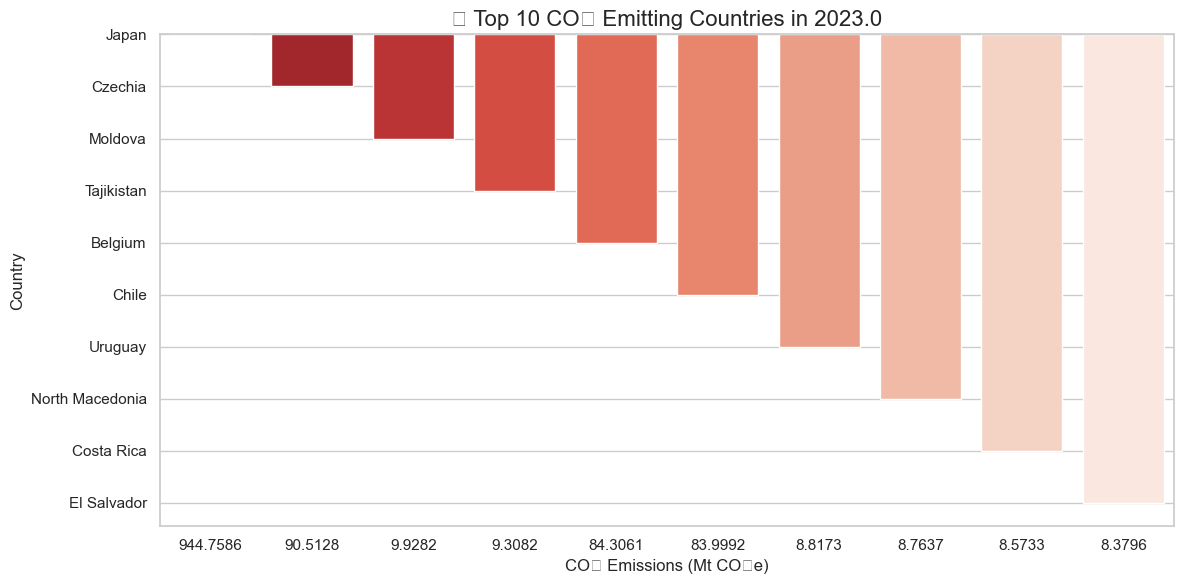

In [16]:
# Top 10 CO₂ Emitting Countries (Most Recent Year)
latest_year = cleaned_df['Time'].max()
latest_data = cleaned_df[cleaned_df['Time'] == latest_year]

top10_co2 = latest_data.sort_values(by='Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e) [EN.GHG.CO2.MT.CE.AR5]', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top10_co2, 
            x='Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e) [EN.GHG.CO2.MT.CE.AR5]', 
            y='Country Name', 
            palette='Reds_r')

plt.title(f'Top 10 CO₂ Emitting Countries in {latest_year}', fontsize=16)
plt.xlabel('CO₂ Emissions (Mt CO₂e)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


C:\Users\krish\AppData\Local\Temp\ipykernel_31008\1504488080.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=co2_data,
C:\Users\krish\AppData\Local\Temp\ipykernel_31008\1504488080.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=co2_data,
C:\Users\krish\AppData\Local\Temp\ipykernel_31008\1504488080.py:24: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\krish\AppData\Local\Temp\ipykernel_31008\1504488080.py:24: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\krish\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Us

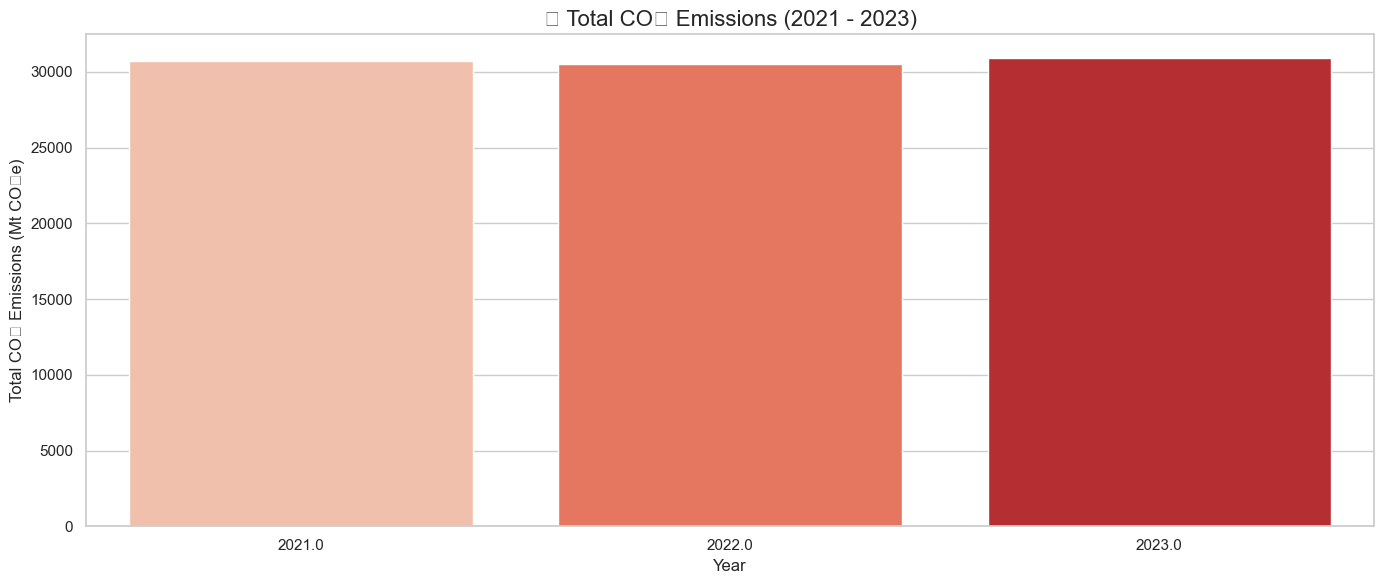

C:\Users\krish\AppData\Local\Temp\ipykernel_31008\1504488080.py:39: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\krish\AppData\Local\Temp\ipykernel_31008\1504488080.py:39: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\krish\AppData\Local\Temp\ipykernel_31008\1504488080.py:39: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
c:\Users\krish\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\krish\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


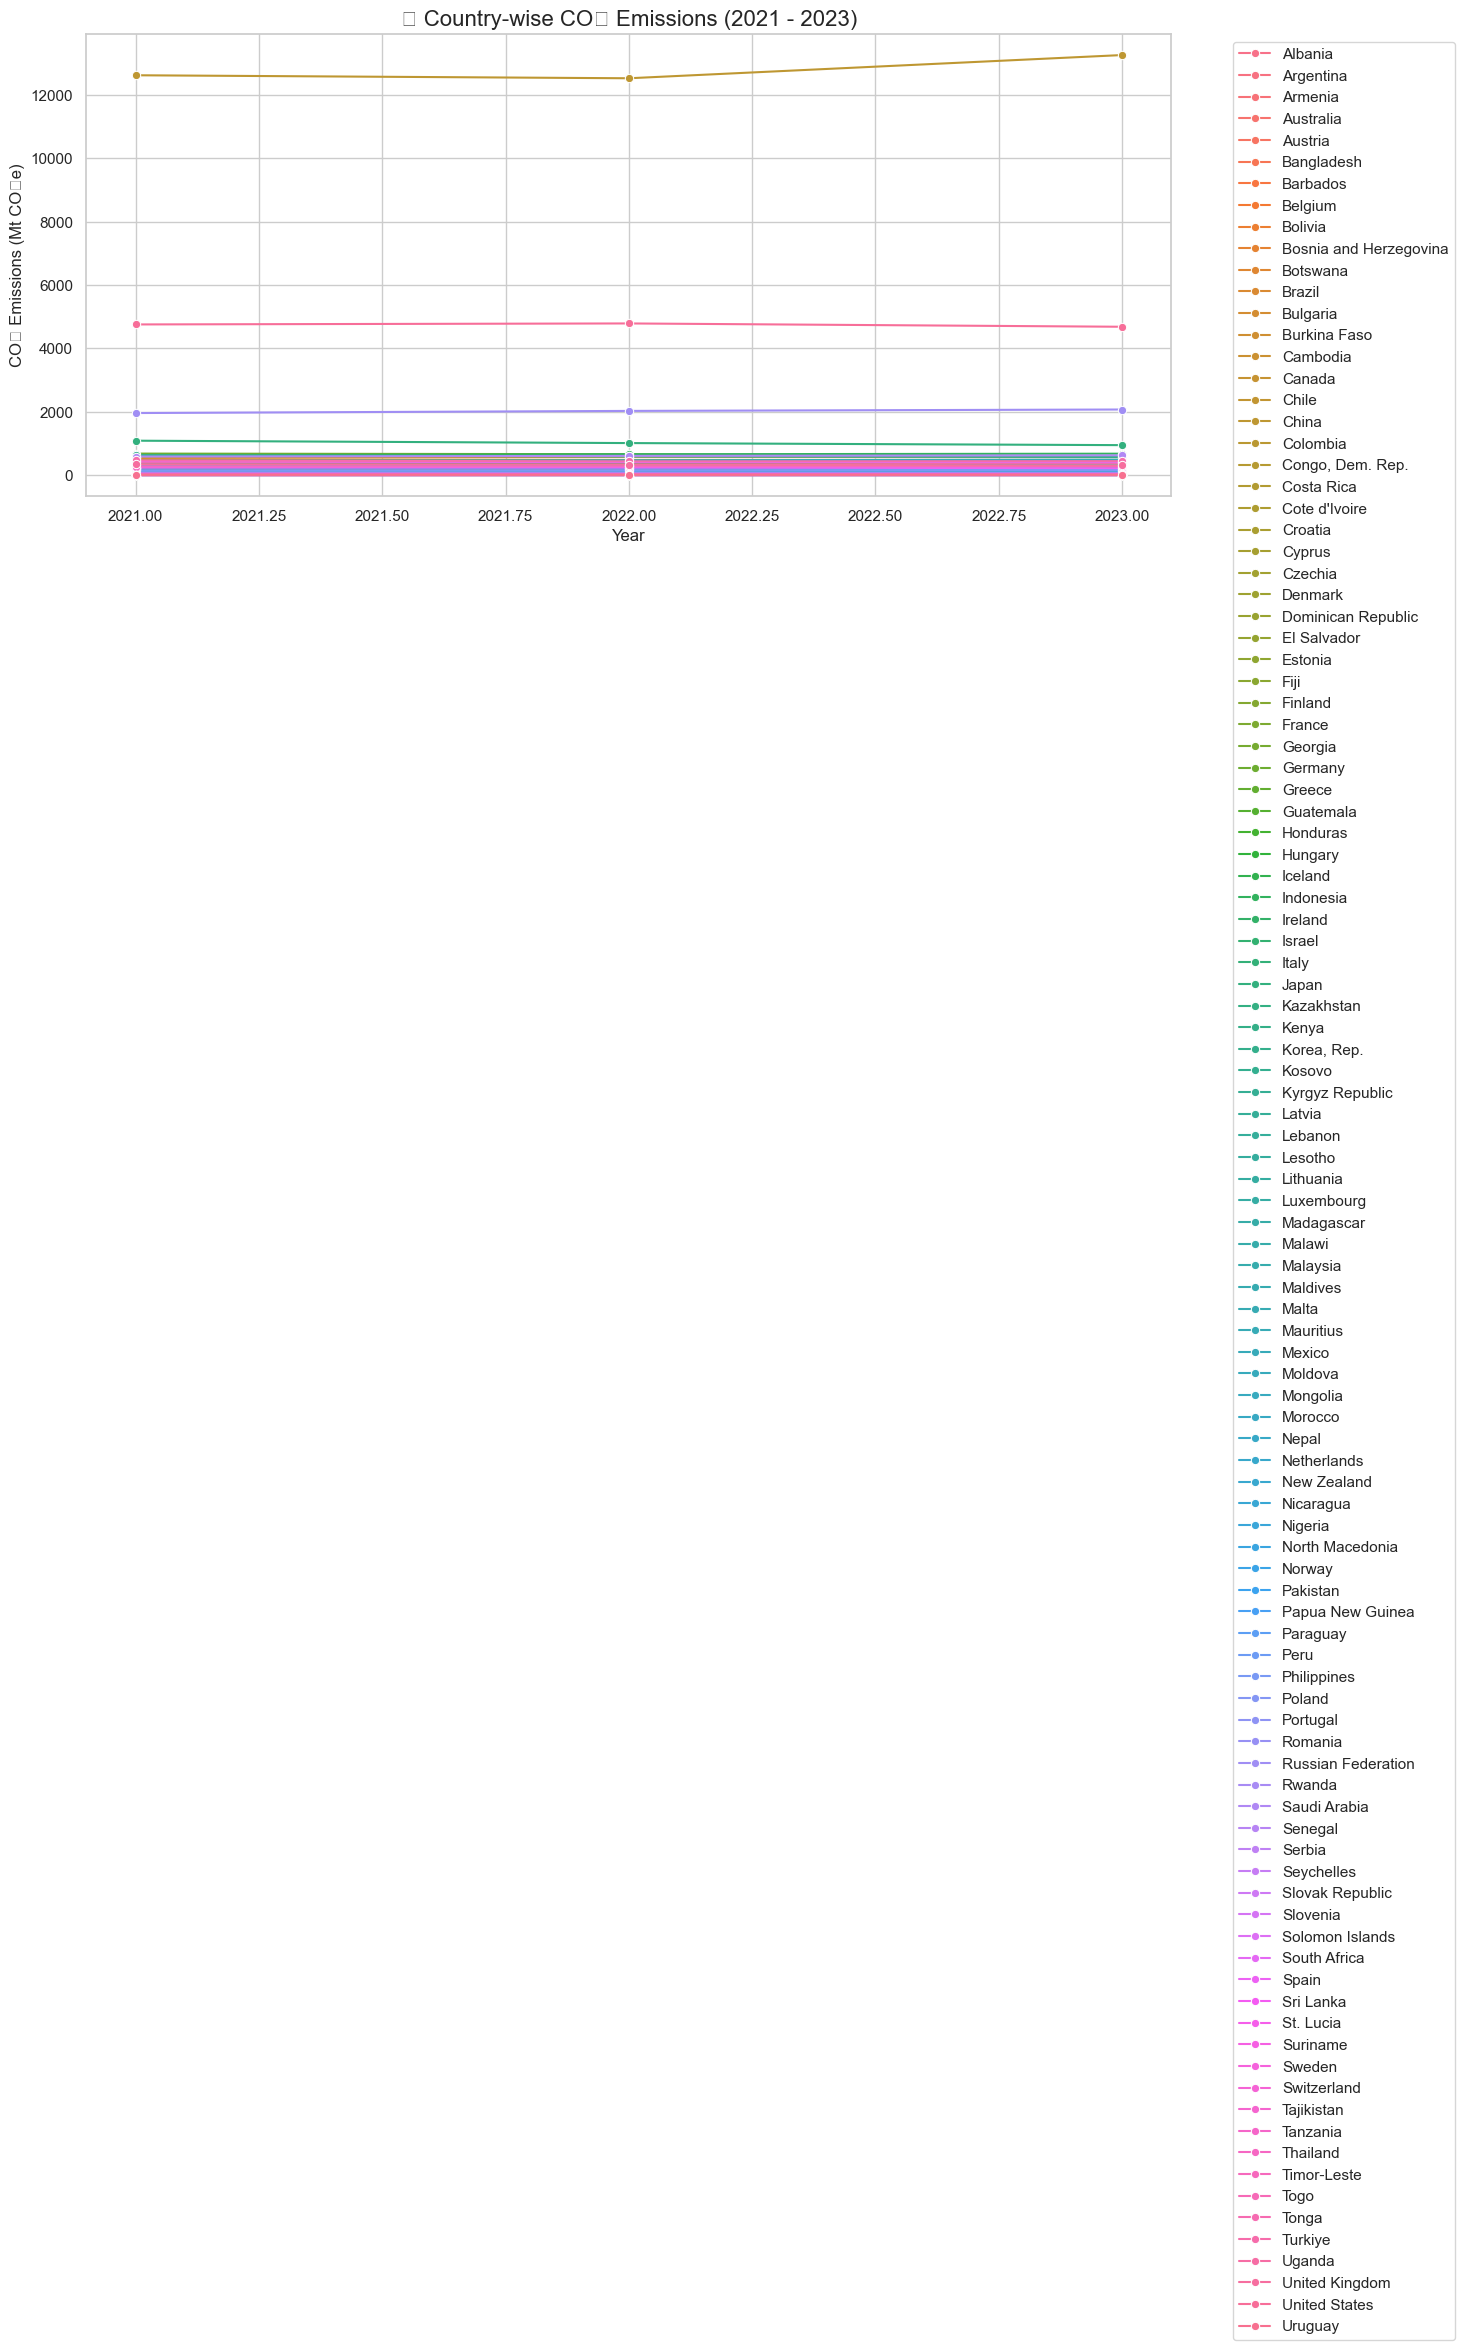

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for 2021, 2022, and 2023
co2_data = cleaned_df[cleaned_df['Time'].isin([2021, 2022, 2023])]

# Convert CO2 emissions to numeric
co2_data['Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e) [EN.GHG.CO2.MT.CE.AR5]'] = pd.to_numeric(
    co2_data['Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e) [EN.GHG.CO2.MT.CE.AR5]'], errors='coerce'
)

# 1.Bar Plot: CO2 Emissions per Year
plt.figure(figsize=(14, 6))
sns.barplot(data=co2_data, 
            x='Time', 
            y='Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e) [EN.GHG.CO2.MT.CE.AR5]', 
            ci=None, 
            estimator=sum, 
            palette='Reds')

plt.title('Total CO₂ Emissions (2021 - 2023)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Total CO₂ Emissions (Mt CO₂e)')
plt.tight_layout()
plt.show()

# 2️.Line Plot: Country-wise CO2 Emissions Over Time
plt.figure(figsize=(14, 6))
sns.lineplot(data=co2_data, 
             x='Time', 
             y='Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e) [EN.GHG.CO2.MT.CE.AR5]', 
             hue='Country Name', 
             marker='o')

plt.title('Country-wise CO₂ Emissions (2021 - 2023)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions (Mt CO₂e)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
